In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv")

In [ ]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [ ]:
dic = {
    'product_name': 'Produto','rating':'Avaliação','rating_count': 'Quantidade de avaliações', 'purchased':'Comprou'
}

In [ ]:
df.rename(columns = dic, inplace = True)

In [ ]:
df.head()

,Produto,Avaliação,Quantidade de avaliações,Comprou
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Produto                   100 non-null    object 
 1   Avaliação                 100 non-null    float64
 2   Quantidade de avaliações  100 non-null    int64  
 3   Comprou                   100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of       Produto  Avaliação  Quantidade de avaliações  Comprou
0   Televisão       3.04                        29        1
1     Celular       3.46                      3872        0
2   Cafeteira       3.25                      1187        0
3   Televisão       3.77                      4097        1
4   Videogame       5.00                      4738        1
..        ...        ...                       ...      ...
95       iPod       4.44                      1372        0
96    Celular       4.66                      1690        1
97  Televisão       4.33                      3364        1
98   Notebook       3.30                      1825        1
99       iPod       4.08                       533        0

[100 rows x 4 columns]>

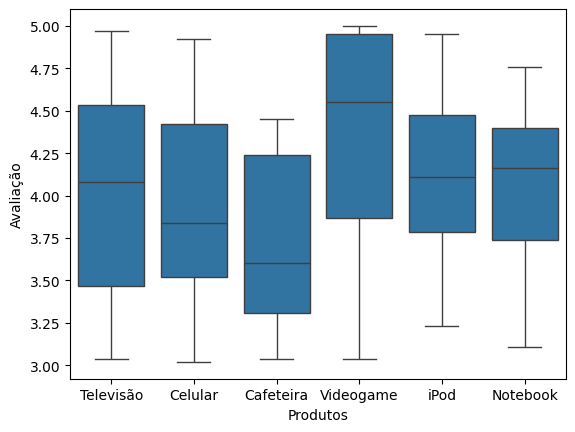

In [ ]:
sns.boxplot(x='Produto', y='Avaliação', data=df)
plt.xlabel('Produtos')
plt.ylabel('Avaliação')
plt.show()

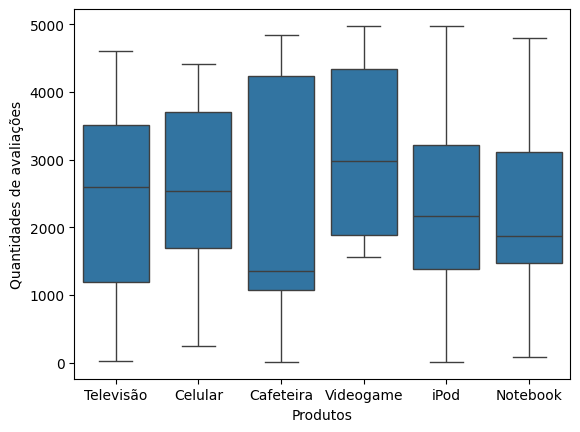

In [ ]:
sns.boxplot(x='Produto', y='Quantidade de avaliações', data=df)
plt.xlabel('Produtos')
plt.ylabel('Quantidades de avaliações')
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
algoritmo = DecisionTreeClassifier()

In [ ]:
produtos = df['Produto'].unique()

In [ ]:
sc = StandardScaler()

In [ ]:
from scipy import stats

In [ ]:
mediaqtd = df.groupby('Produto')['Quantidade de avaliações'].mean()
mediaav = df.groupby('Produto')['Avaliação'].mean()

modas = df.groupby('Produto')['Comprou'].apply(lambda x: x.mode().iloc[0])

modas

,Comprou
Produto,
Cafeteira,0
Celular,1
Notebook,1
Televisão,1
Videogame,1
iPod,0


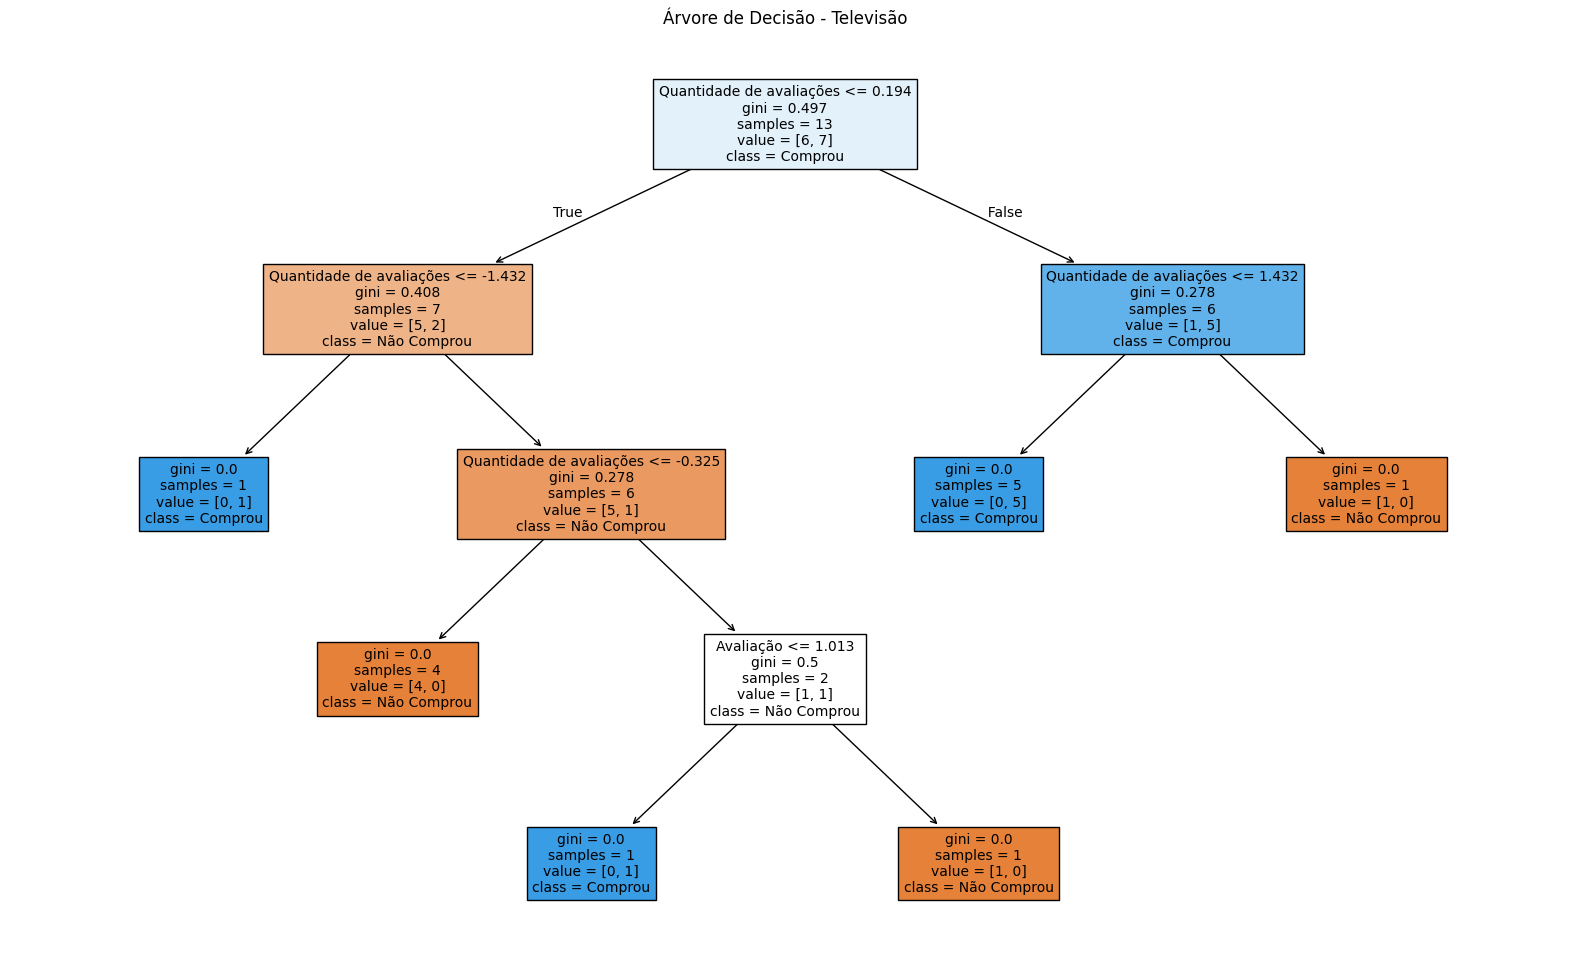

In [ ]:
for produto in produtos:
    df_produto = df[df['Produto'] == produto].copy()
    X_deste_produto = df_produto[['Avaliação', 'Quantidade de avaliações']].values
    Y_deste_produto = df_produto['Comprou'].values

    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_deste_produto, Y_deste_produto, test_size=0.3, random_state=42)
    X_treino = sc.fit_transform(X_treino)
    X_teste = sc.transform(X_teste)
    algoritmo.fit(X_treino, Y_treino)


    plt.figure(figsize=(20, 12))
    tree.plot_tree(algoritmo,
                    feature_names=['Avaliação', 'Quantidade de avaliações'],
                    class_names=['Não Comprou', 'Comprou'],
                    filled=True,
                    fontsize=10)
    plt.title(f'Árvore de Decisão - {produto}')
    plt.show()

In [ ]:


print("Métricas por produto")

for produto in produtos:
    df_produto = df[df['Produto'] == produto].copy()

    X_produto_data = df_produto['Avaliação'].values.reshape(-1, 1)
    Y_produto_data = df_produto['Comprou'].values.reshape(-1, 1)

    X_produto_scaled = sc.transform(X_produto_data)

    Y_pred_produto = algoritmo.predict(X_produto_scaled)

    accuracy = accuracy_score(Y_produto_data, Y_pred_produto)
    precision = precision_score(Y_produto_data, Y_pred_produto, zero_division=1)
    recall = recall_score(Y_produto_data, Y_pred_produto, zero_division=1)
    f1 = f1_score(Y_produto_data, Y_pred_produto, zero_division=1)
    cm = confusion_matrix(Y_produto_data, Y_pred_produto)

    print(f"Metricas de: {produto}:")
    print(f"  Amostras: {X_produto_data.shape[0]}")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print("  Confusion Matrix:")
    print(cm)
    print("-" * 30)

Métricas por produto
Metricas de: Televisão:
  Amostras: 19
  Accuracy: 0.631578947368421
  Precision: 0.6111111111111112
  Recall: 1.0
  F1 Score: 0.7586206896551724
  Confusion Matrix:
[[ 1  7]
 [ 0 11]]
------------------------------
Metricas de: Celular:
  Amostras: 21
  Accuracy: 0.6190476190476191
  Precision: 0.6190476190476191
  Recall: 1.0
  F1 Score: 0.7647058823529411
  Confusion Matrix:
[[ 0  8]
 [ 0 13]]
------------------------------
Metricas de: Cafeteira:
  Amostras: 9
  Accuracy: 0.4444444444444444
  Precision: 0.375
  Recall: 1.0
  F1 Score: 0.5454545454545454
  Confusion Matrix:
[[1 5]
 [0 3]]
------------------------------
Metricas de: Videogame:
  Amostras: 17
  Accuracy: 0.6470588235294118
  Precision: 0.6470588235294118
  Recall: 1.0
  F1 Score: 0.7857142857142857
  Confusion Matrix:
[[ 0  6]
 [ 0 11]]
------------------------------
Metricas de: iPod:
  Amostras: 18
  Accuracy: 0.5
  Precision: 0.47058823529411764
  Recall: 1.0
  F1 Score: 0.64
  Confusion Matrix

In [ ]:
"""Com base nas métricas acima, os modelos de árvore de decisão apresentam níveis variados de eficácia para diferentes produtos.
Embora o recall seja consistentemente alto (1.0 para a maioria dos produtos), indicando que os modelos são bons em identificar todas as compras reais,
os scores de precisão e acurácia são mais baixos, sugerindo que os modelos também preveem compras incorretamente para não-compras.
Portanto, os modelos são eficazes em identificar compradores em potencial, mas têm uma taxa significativa de falsos positivos."""